# Kinetic energy gain/loss from dynamical friction and diffusion

Figure 10.6 from Chapter 10 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plot of the rate at which a star loses energy from dynamical friction, the rate at which it gains
energy from diffusion in phase space, and the net rate of change in its kinetic energy.

In [5]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# scipy for erf()

from scipy import special

# suppress nuisance warnings

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [6]:
plotFile = 'Fig10_6.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Drift and Diffusion Coefficients

### Drift Coefficient

From Eqn 10.53

\begin{equation}
   A ( \Delta v_\parallel ) = - C_0 \frac{1+m/m_\star}{\sqrt{2} \sigma} G_\mathrm{df} (X)
\end{equation}
with normalization constant
\begin{equation}
   C_0 = 4\sqrt{2}\pi \frac{G^2 \rho_\star m_\star \ln\Lambda}{\sigma} ,
\end{equation}
where $X = v/(\sqrt{2}\sigma)$ is the dimensionless speed of the test star and
$G_\mathrm{df} (X)$ is the dynamical friction function:
\begin{equation}
   G_\mathrm{df} (X) = \frac{1}{2 X^2} \left[\mathrm{erf} (X) - \frac{2}{\sqrt\pi} X e^{-X^2} \right] 
\end{equation}
To calculate $A(\Delta v_\parallel)$ in "arbitrary units" we really just plot $G_{\rm df}(X)$

### Diffusion Coefficients
 
The perpendicular and parallel diffusion coefficients are:
\begin{equation}
  D(\Delta |\vec{v}_\perp|^2) = C_0\left(\frac{\mathrm{erf}(X) - G_\mathrm{df}(X)}{X}\right) 
\end{equation}
and
\begin{equation}
  D(\Delta v_\parallel^2) = C_0\left(\frac{G_\mathrm{df}(X)}{X}\right)
\end{equation}

In [7]:
def Gdf(X):
    return (special.erf(X) - (2.0/np.sqrt(np.pi))*X*np.exp(-X*X))/(2*X*X)

def Dperp(X):
    return ((special.erf(X)-Gdf(X))/X)

def Dpara(X):
    return (Gdf(X)/X)

## Rate of change of kinetic energy 

From Eqn 10.58

\begin{equation}
\frac{dK}{dt} = m\left[\frac{1}{2}D(\Delta v_\parallel^2)+\frac{1}{2}D(|\Delta\vec{v}_\perp|^2) 
   + vA(\Delta v_\parallel)\right]
\end{equation}

which can de divided into two parts, gain and loss of KE:
\begin{equation}
  \left(\frac{dK}{dt}\right)_{\rm gain} = mC_0\left[\frac{1}{2}D(\Delta v_\parallel^2)+\frac{1}{2}D(|\Delta\vec{v}_\perp|^2)\right]
\end{equation}
and 
\begin{equation}
  \left(\frac{dK}{dt}\right)_{\rm loss} = mvA(\Delta v_\parallel) = -mC_0 (1+m/m_\star) X G_{df}(X)
\end{equation}
following equation 10.53

In [8]:
minX = 0.01
maxX = 100.0

X = 10.0**np.linspace(np.log10(minX),np.log10(maxX),301)

mms = 1.0 # (m/m_star)

# gain, loss, and net

dKdt_gain = 0.5*(Dperp(X) + Dpara(X))

dKdt_loss = -(1+mms)*X*Gdf(X)

dKdt = dKdt_gain + dKdt_loss

# axis limits

xMin = minX
xMax = maxX
yMin = -0.7
yMax = 0.7

## Figure 10.6

log-linear plot of the three components
 * gain - dashed black line
 * loss - dash-dot black line
 * net - solid black line, thicker

Show dK/dt=0 with a dotted horizontal line


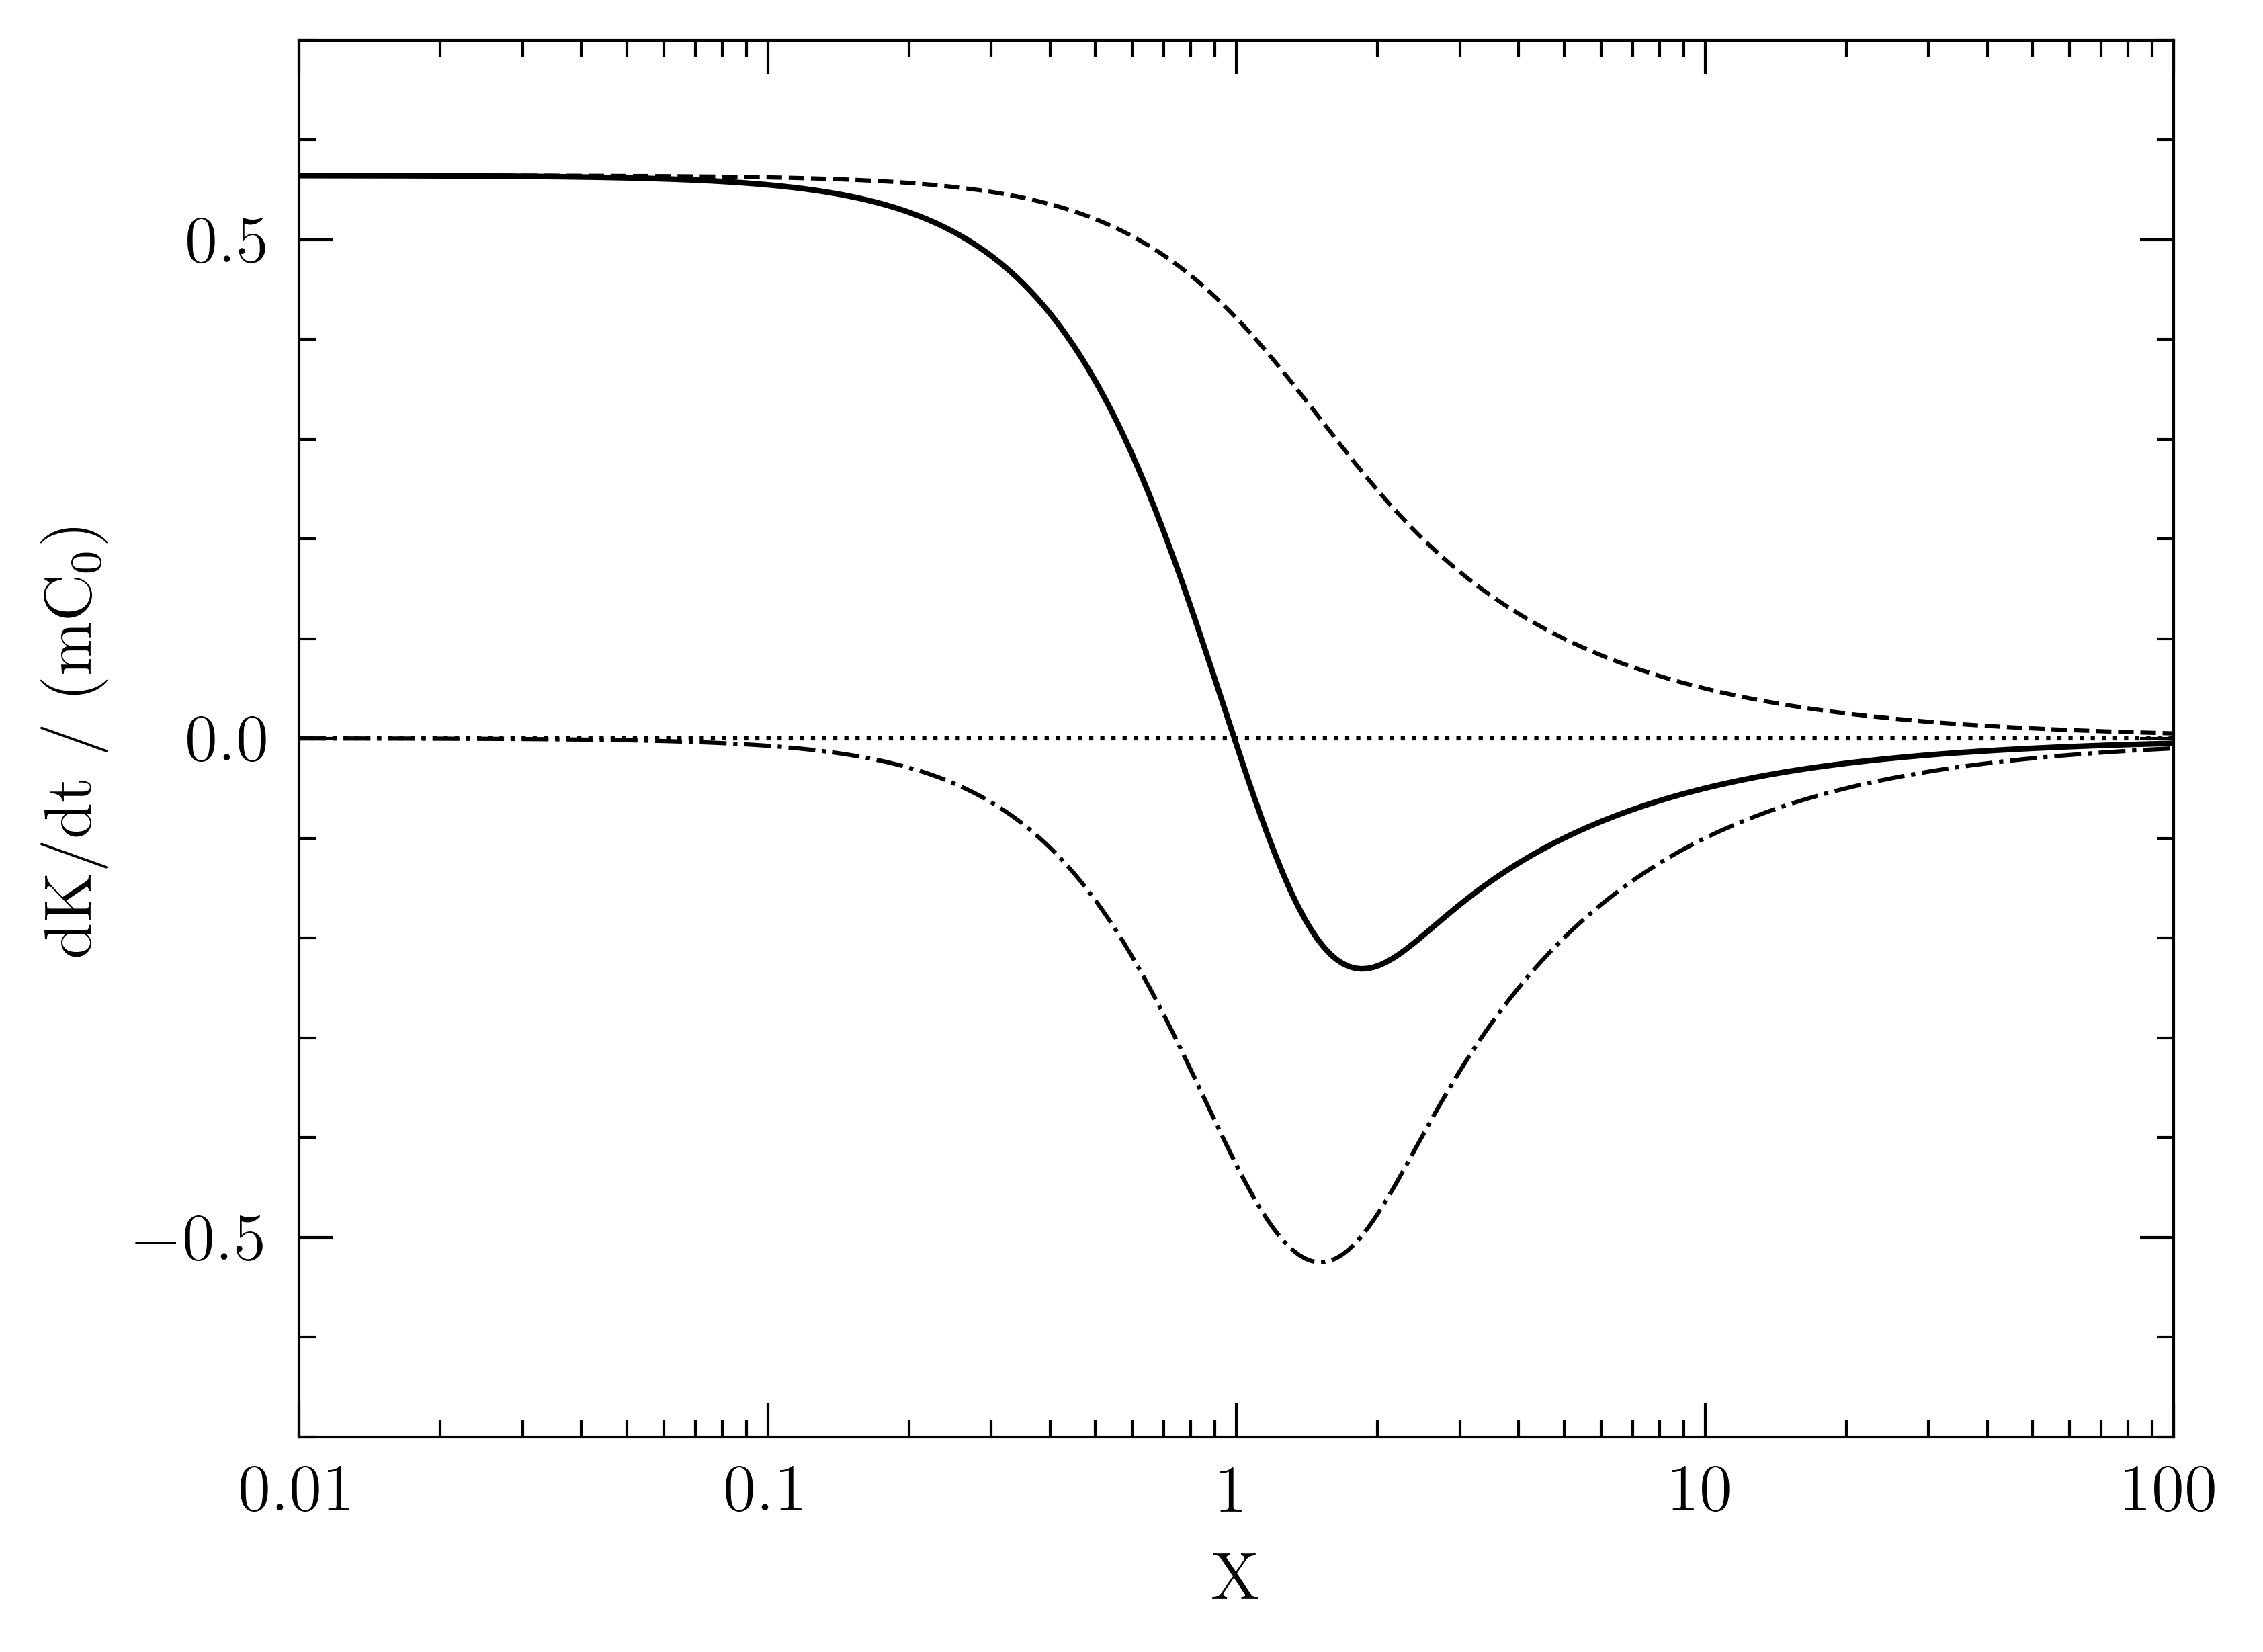

In [9]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(xMin,xMax)
ax.set_xscale('log')
ax.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks([0.01,0.1,1,10,100])
ax.set_xticklabels(['0.01','0.1','1','10','100'])
ax.set_xlabel(r'X',fontsize=axisFontSize)

ax.set_ylim(yMin,yMax)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_ylabel(r'dK/dt / (mC$_0$)',fontsize=axisFontSize)

ax.plot(X,dKdt,'-',lw=1.0,color='black',zorder=10)
ax.plot(X,dKdt_gain,'--',lw=0.75,color='black',zorder=9)
ax.plot(X,dKdt_loss,'-.',lw=0.75,color='black',zorder=9)

ax.hlines(0.0,xMin,xMax,ls=[':'],colors=['black'],lw=0.75,zorder=8)

   
plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')